In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as movie

In [20]:
n=300
x=np.linspace(0,30,n)
y=np.linspace(0,30,n)
t=np.linspace(0,60,n)
dx=x[1]-x[0]
dy=y[1]-y[0]
c=1.0
dt=0.5*dx/c
a=c*dt/dx
b=c*dt/dy

In [21]:
#creates a matrix of zeros
initial=np.zeros((n,n))
#sets the perturbation in the given point
initial[n/3][n/2-1]=-0.5
#creates the mask as a ones matrix
mask=np.ones((n,n))
#sets the conditions
#left-hand side wall
mask[:,0]=0
#right-hand side wall
mask[:,n-1]=0
#upper wall
mask[0,:]=0
#lower wall
mask[n-1,:n-1]=0
#slit
mask[-n/3][0:n/2-20]=0
mask[-n/3][n/2+20:]=0
#mask[-n/3][-n/2:n/2]=1
#makes the product
fotogramas=[]
fotogramas.append(initial)


In [22]:
#plt.imshow(mask)
#plt.show()
#implementation of the solution is based on the notebook available in github
#value of the slit can be considered as a fixed condition

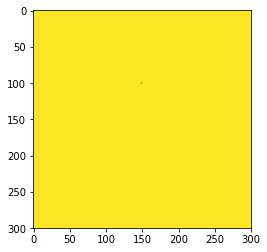

In [23]:
#calculates for t=1 using numpy roll
#future_1=np.zeros((n+1,n+1))
next_x=np.roll(initial,+1,axis=0)
next_y=np.roll(initial,+1,axis=1)
down_x=np.roll(initial,-1,axis=0)
down_y=np.roll(initial,-1,axis=1)
future=(a**2/2)*(next_x+down_x)+(b**2/2)*(next_y+down_y)+initial*(1-b**2-a**2)
past=np.copy(initial)
present=np.copy(future)
#print present
#multiplies by the mask
present=present*mask
#print present
fotogramas.append(present)


In [24]:
#knowing t=0 and t=1 we can continue the temporal loop
#calculate the number of temporal iterations
m=60.0/dt

In [29]:
#creates the whole time iteration    
for t in range(1500):
    downx=np.roll(present,-1,axis=0)
    upx=np.roll(present,+1,axis=0)  
    downy=np.roll(present,-1,axis=1)
    upy=np.roll(present,+1,axis=1)
    future=(a**2/2)*(upx+downx)+(b**2/2)*(upy+downy)+present*(1-b**2-a**2)-past
    past=np.copy(present)
    present=np.copy(future)
    present=present*mask
    fotogramas.append(present)
    if t==750:
        mitad=np.copy(present)
    if t==1500:
        total=np.copy(present)
plt.figure(1)
plt.subplot(1,2,1)
plt.imshow(mitad)
plt.title('30s')
plt.tight_layout()
plt.subplot(1,2,2)
plt.imshow(total)
plt.title('60s')
plt.tight_layout()
plt.savefig('Resultados_1.png')


In [35]:
#let's try animate, based on recomendations from Alfredo Ricci and Santiago Salazar
figure=plt.figure(2)
#sets the 
init=plt.imshow(initial,animated='True')
def func(i):
    #sets the imshow as an animated one
    init.set_frames(fotogramas[i])
    return init
#creates the mp4 file
onda=movie.FuncAnimation(figure,func,frames=60)
onda.save('Onda.mp4')